* Question 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

256


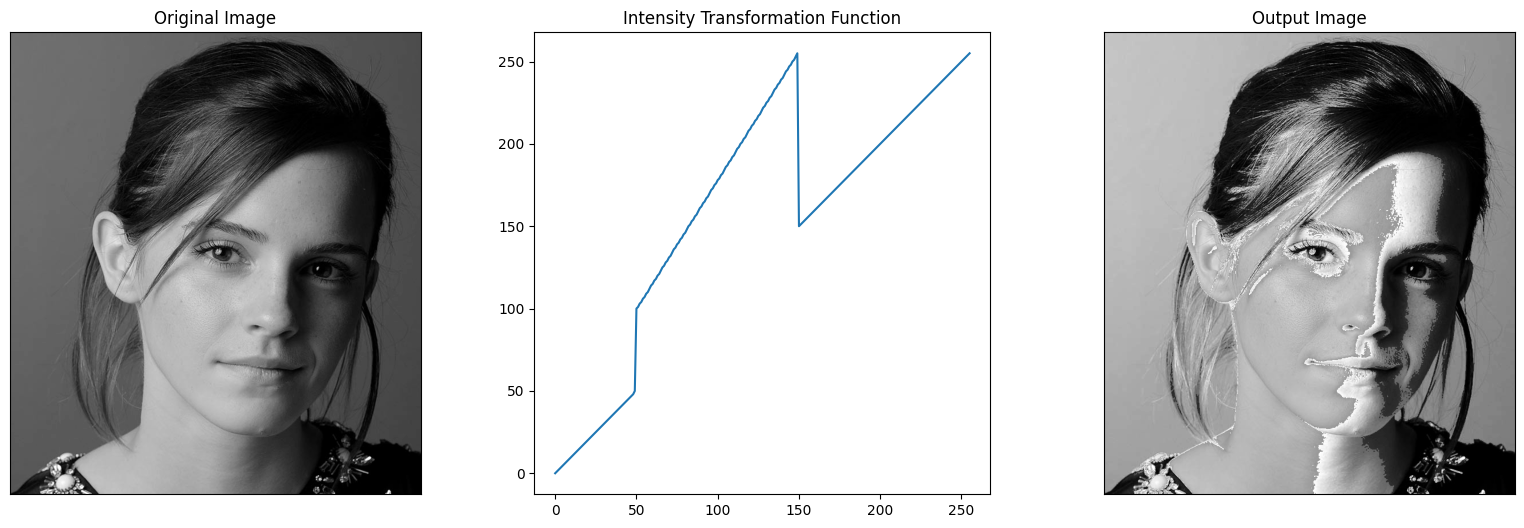

In [6]:
# Define the transformation
transform1 = np.concatenate((np.linspace(0, 50, 50), np.linspace(100, 255, 100), np.linspace(150, 255, 106)), axis=0).astype(np.uint8)
print(len(transform1))

# Read the image
image_orig = cv.imread('a1images\emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply the transformation
image_transformed = cv.LUT(image_orig, transform1)

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].imshow(image_orig, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original Image")
ax[1].plot(transform1)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(image_transformed, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title("Output Image")
plt.show()

* Question 2
a)

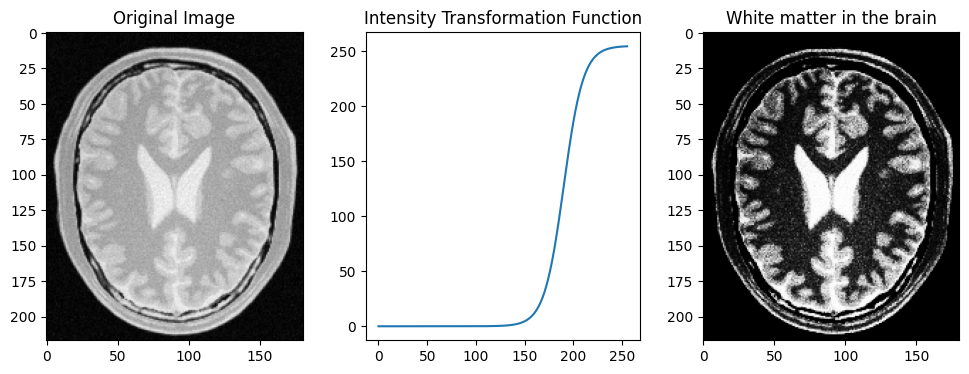

In [9]:
def white_matter_curve(x):
    #sigmoid function to map the intensity values for white matter
    aplpha = 0.1
    beta = 190
    curve = 255/(1+np.exp(-aplpha*(x-beta)))
    return curve

f = np.linspace(0,255,256)
transform2 = white_matter_curve(f)
fig2 = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform2)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(fig2, cmap = "gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].plot(transform2)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(True)
ax[2].get_yaxis().set_visible(True)
ax[2].set_title("White matter in the brain")

plt.show()

b)

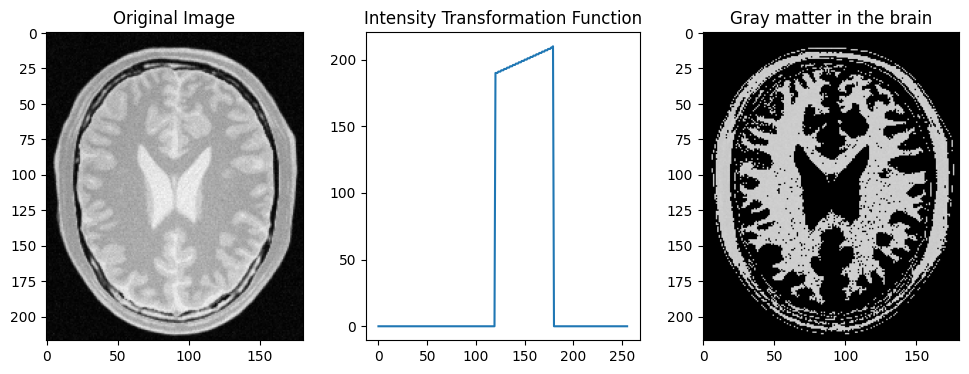

In [6]:
transform3 = np.concatenate((np.linspace(0, 0, 120), np.linspace(190, 210, 60),np.linspace(0, 0, 76)), axis=0).astype(np.uint8)
fig2 = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform3)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(fig2, cmap = "gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].plot(transform3)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(True)
ax[2].get_yaxis().set_visible(True)
ax[2].set_title("Gray matter in the brain")

plt.show()

* Question 3

Text(0, 0.5, 'Frequency')

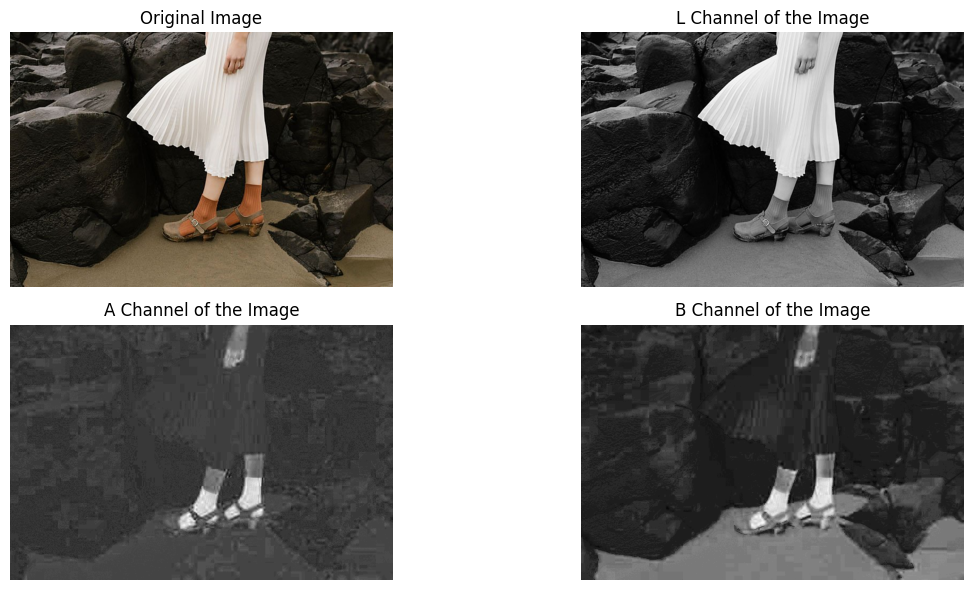

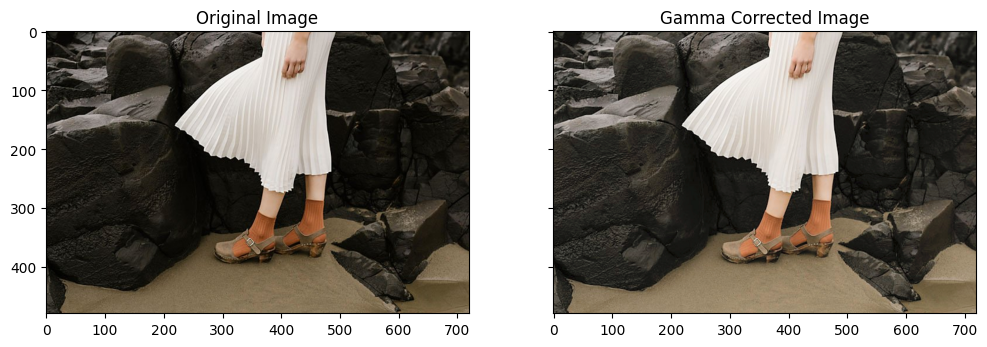

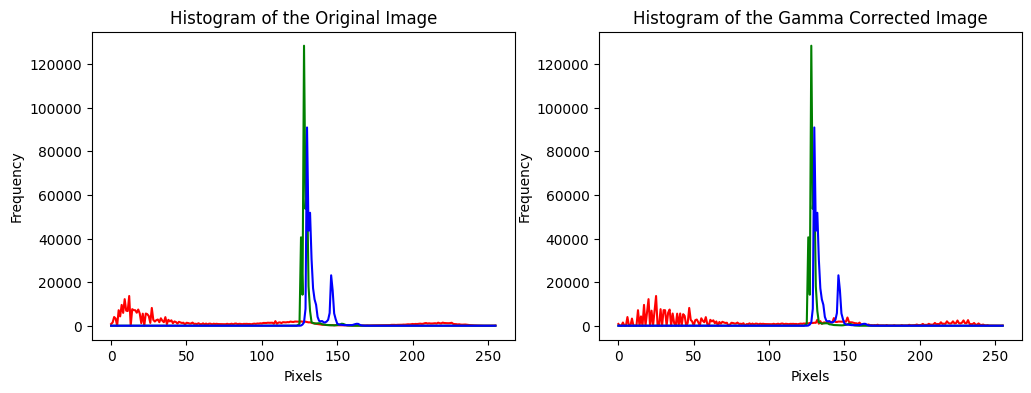

In [10]:
source_image = cv.imread('a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

rgb_image = cv.cvtColor(source_image, cv.COLOR_BGR2RGB)

img_ceilab = cv.cvtColor(source_image, cv.COLOR_BGR2Lab)        # Convert the image into CEILAB color space  
l_channel, a_channel, b_channel = cv.split(img_ceilab)      # Split the converted image into three channels     

#region
plt.figure(figsize=(13,6))

plt.subplot(221)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(l_channel, cmap="gray")
plt.title('L Channel of the Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap="gray")
plt.title('A Channel of the Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap="gray")
plt.title('B Channel of the Image')
plt.axis('off')

plt.tight_layout()
#endregion

gamma = 0.75
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
l_channel_gamma_corrected = cv.LUT(l_channel, table)        # Apply gamma correction only for L channel
img_gamma = cv.merge((l_channel_gamma_corrected, a_channel, b_channel))     # Merge L channel with other channels
img_corrected = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB)

#region
fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,6))
ax[0].imshow(rgb_image)
ax[0].set_title('Original Image')

ax[1].imshow(img_corrected)
ax[1].set_title('Gamma Corrected Image')
#endregion

f, ax = plt.subplots(1, 2, figsize=(12, 4))
space = ('l', 'a', 'b')
color = ('r', 'g', 'b')

for i, c in enumerate(space):
    hist_orig = cv.calcHist([img_ceilab], [i], None, [256], [0, 256])       # Calculate histogram for original image
    ax[0].plot(hist_orig, color=color[i])
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])       # Calculate histogram for gamma corrected image
    ax[1].plot(hist_gamma, color=color[i])

#region   
ax[0].set_title('Histogram of the Original Image')
ax[0].set_xlabel('Pixels')
ax[0].set_ylabel('Frequency')


ax[1].set_title('Histogram of the Gamma Corrected Image')
ax[1].set_xlabel('Pixels')
ax[1].set_ylabel('Frequency')

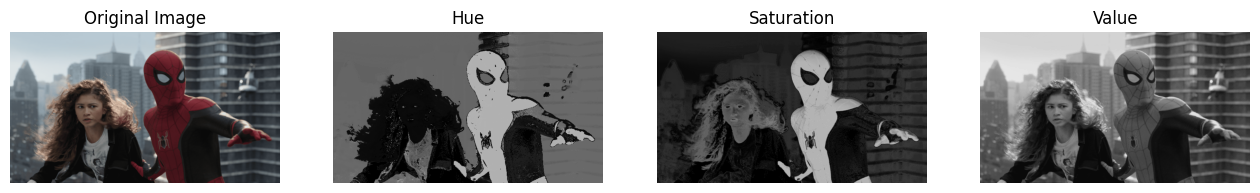

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images\spider.png')
assert img is not None

#Convert the image to RBG since the img opens in BGR format
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#Convert the image to HSV
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

#Split the image into Hue, Saturation and Value
img_hue, img_saturation, img_value = cv.split(img_hsv)

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_hue, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Hue')
ax[2].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation')
ax[3].imshow(img_value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value')
for a in ax:
    a.axis('off')

plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from ipywidgets import interactive

def vibrance(x, a, sigma=70):
    return int(min(x + (a*128)*np.exp((-(x-128)**2)/(2*(sigma**2))), 255))  # Transformation function

def transform(a):
    # This function will apply the desired transformation to selected planes of the image
    plt.clf()
    table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')
    s_channel_corrected = cv.LUT(s_channel, table)          # Apply vibrance correction to the saturation plane
    img_corrected = cv.merge((h_channel, s_channel_corrected, v_channel))   # Merge corrected plane with hue and value planes
    img_corrected_rgb = cv.cvtColor(img_corrected, cv.COLOR_HSV2RGB)
    #region
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(img_corrected_rgb)
    plt.title('Intensity Transformed Image')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    #endregion

# Interactive Slider
final_plot = interactive(transform, a=(0, 1, 0.001))
output = final_plot.children[-1]
output.layout.height = '400px'
final_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, step=0.001), Output(layout=Layout(heigh…

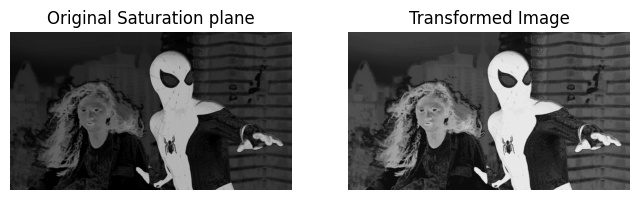

In [10]:
a = 0.54
table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')
s_channel_corrected = cv.LUT(s_channel, table)

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Saturation plane')
ax[1].imshow(s_channel_corrected, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for axs in ax:
    axs.axis('off')
plt.show()

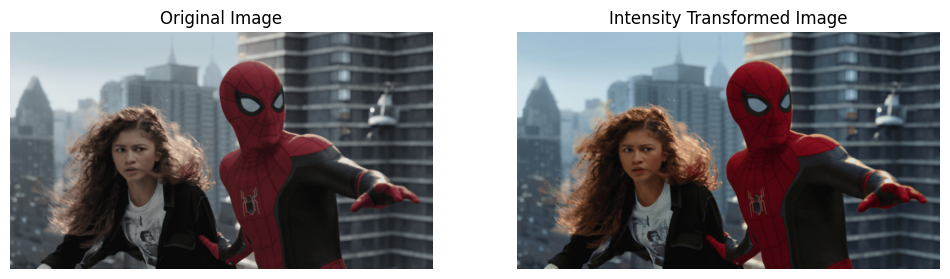

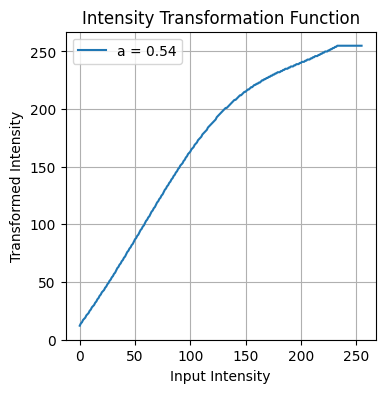

In [11]:
img_corrected = cv.merge((h_channel, s_channel_corrected, v_channel))   # Merge corrected plane with hue and value planes
img_corrected_rgb = cv.cvtColor(img_corrected, cv.COLOR_HSV2RGB)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
    
plt.subplot(122)
plt.imshow(img_corrected_rgb)
plt.title('Intensity Transformed Image')
plt.axis('off')
    
plt.show()
    
a_value = np.arange(0, 256)
plt.figure(figsize=(4,4))
plt.plot(a_value,table, label=f'a = {a}')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid()
    
plt.show()